In [1]:
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.evolve import Evolve
from cosmic.utils import a_from_p
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.integrate as integrate

In [138]:
def chirp_m(mass1, mass2):
    """input: masses of the binary
    output: chirp mass of the binary"""
    chirp= (mass1*mass2)**(3/5)*(mass1+mass2)**(-1/5)
    return chirp

In [3]:
def time_to_merge(m1, m2, a0, e0):
    """Inputs:
    m1 & m2: the current masses of binaries (in solar mass), 
    a0: semi-major axis (in solar radius), 
    e0: ellipticity
    
    Return:
    remaining time to merge (in Myr)"""
    solar_mass = 1.989*10**30
    solar_radius = 6.957*10**8
    beta = (64/5)*(6.67*10**(-11))**3*m1*m2*(m1+m2)*solar_mass**3/(3*10**8)**5
    inverse = (e0**(12/19)/(1-e0**2))*(1+121*e0**2/304)**(870/2299)
    c0 = a0*solar_radius/inverse
    Tmerge = integrate.quad(lambda e: (12*c0**4/(19*beta))*(e**(29/19)*(1+121*e**2/304)**(1181/2299))/(1-e**2)**(3/2), 0, e0)
    Tmerge = Tmerge[0]/(365.25*24*3600*1000000)
    return Tmerge

For each kick prescription, we consider 11 different stellar metallicities: 1.5Z, Z, 0.5Z, 0.375Z, 0.25Z, 0.125Z, 0.05Z, 0.0375Z, 0.025Z, 0.0125Z, and 0.005Z. We then evolve 10^5 binaries in each metallicitiy bin for 50 Myr with BSE. We sample the primary mass from a p(m) dm ∝ m−2.3 dm power law from 18M to 150M (Kroupa 2001), and use a mass ratio distribution flat from 0 to 1. The eccentricities are drawn from a thermal distribution, p(e)de = 2e de, and
the initial semi-major axes from a distribution flat in log(a) from 10R to 10^5R. We limit our sample to
only those BBHs that will merge from emission of gravitational waves in less than 13.8 Gyr

for metallicity, I used 1.5Z, Z, 0.5Z, 0.25Z, 0.125Z, 0.05Z, 0.025Z, 0.005Z

In [4]:
start = time.time()
init_z37_5, m_sin_z37_5, m_bin_z37_5, n_sin_z37_5, n_bin_z37_5 = InitialBinaryTable.sampler('independent',
                                                                                    final_kstar1=14,
                                                                                    final_kstar2=14,
                                                                                    binfrac_model=1.0,
                                                                                    primary_model='kroupa01',
                                                                                    ecc_model='thermal',
                                                                                    porb_model='log_uniform',
                                                                                    SF_start=13700.0,
                                                                                    SF_duration=0.0,
                                                                                    met=0.0075,
                                                                                    size=50000)
end = time.time()
print("--- %s seconds ---" % (end - start))

--- 2.039978504180908 seconds ---


In [5]:
start = time.time()
init_z01_25, m_sin_z01_25, m_bin_z01_25, n_sin_z01_25, n_bin_z01_25 = InitialBinaryTable.sampler('independent',
                                                                                    final_kstar1=14,
                                                                                    final_kstar2=14,
                                                                                    binfrac_model=1.0,
                                                                                    primary_model='kroupa01',
                                                                                    ecc_model='thermal',
                                                                                    porb_model='log_uniform',
                                                                                    SF_start=13700.0,
                                                                                    SF_duration=0.0,
                                                                                    met=0.00025,
                                                                                    size=50000)
end = time.time()
print("--- %s seconds ---" % (end - start))

--- 2.0201456546783447 seconds ---


In [6]:
start = time.time()
init_z50, m_sin_z50, m_bin_z50, n_sin_z50, n_bin_z50 = InitialBinaryTable.sampler('independent',
                                                                                    final_kstar1=14,
                                                                                    final_kstar2=14,
                                                                                    binfrac_model=1.0,
                                                                                    primary_model='kroupa01',
                                                                                    ecc_model='thermal',
                                                                                    porb_model='log_uniform',
                                                                                    SF_start=13700.0,
                                                                                    SF_duration=0.0,
                                                                                    met=0.01,
                                                                                    size=50000)
end = time.time()
print("--- %s seconds ---" % (end - start))

--- 2.094005584716797 seconds ---


In [7]:
start = time.time()
init_z25, m_sin_z25, m_bin_z25, n_sin_z25, n_bin_z25 = InitialBinaryTable.sampler('independent',
                                                                                    final_kstar1=14,
                                                                                    final_kstar2=14,
                                                                                    binfrac_model=1.0,
                                                                                    primary_model='kroupa01',
                                                                                    ecc_model='thermal',
                                                                                    porb_model='log_uniform',
                                                                                    SF_start=13700.0,
                                                                                    SF_duration=0.0,
                                                                                    met=0.005,
                                                                                    size=50000)
end = time.time()
print("--- %s seconds ---" % (end - start))

--- 2.0838727951049805 seconds ---


In [8]:
start = time.time()
init_z12_5, m_sin_z12_5, m_bin_z12_5, n_sin_z12_5, n_bin_z12_5 = InitialBinaryTable.sampler('independent',
                                                                                    final_kstar1=14,
                                                                                    final_kstar2=14,
                                                                                    binfrac_model=1.0,
                                                                                    primary_model='kroupa01',
                                                                                    ecc_model='thermal',
                                                                                    porb_model='log_uniform',
                                                                                    SF_start=13700.0,
                                                                                    SF_duration=0.0,
                                                                                    met=0.0025,
                                                                                    size=50000)
end = time.time()
print("--- %s seconds ---" % (end - start))

--- 2.0341005325317383 seconds ---


In [9]:
start = time.time()
init_z05, m_sin_z05, m_bin_z05, n_sin_z05, n_bin_z05 = InitialBinaryTable.sampler('independent',
                                                                                    final_kstar1=14,
                                                                                    final_kstar2=14,
                                                                                    binfrac_model=1.0,
                                                                                    primary_model='kroupa01',
                                                                                    ecc_model='thermal',
                                                                                    porb_model='log_uniform',
                                                                                    SF_start=13700.0,
                                                                                    SF_duration=0.0,
                                                                                    met=0.001,
                                                                                    size=50000)
end = time.time()
print("--- %s seconds ---" % (end - start))

--- 2.011317253112793 seconds ---


In [10]:
start = time.time()
init_z02_5, m_sin_z02_5, m_bin_z02_5, n_sin_z02_5, n_bin_z02_5 = InitialBinaryTable.sampler('independent',
                                                                                    final_kstar1=14,
                                                                                    final_kstar2=14,
                                                                                    binfrac_model=1.0,
                                                                                    primary_model='kroupa01',
                                                                                    ecc_model='thermal',
                                                                                    porb_model='log_uniform',
                                                                                    SF_start=13700.0,
                                                                                    SF_duration=0.0,
                                                                                    met=0.0005,
                                                                                    size=50000)
end = time.time()
print("--- %s seconds ---" % (end - start))

--- 1.9650981426239014 seconds ---


In [11]:
start = time.time()
init_z005, m_sin_z005, m_bin_z005, n_sin_z005, n_bin_z005 = InitialBinaryTable.sampler('independent',
                                                                                    final_kstar1=14,
                                                                                    final_kstar2=14,
                                                                                    binfrac_model=1.0,
                                                                                    primary_model='kroupa01',
                                                                                    ecc_model='thermal',
                                                                                    porb_model='log_uniform',
                                                                                    SF_start=13700.0,
                                                                                    SF_duration=0.0,
                                                                                    met=0.0001,
                                                                                    size=50000)
end = time.time()
print("--- %s seconds ---" % (end - start))

--- 2.0146069526672363 seconds ---


In [12]:
colors = {'green' : '#1b9e77', 'purple' : '#d95f02', 'orange' : '#7570b3', 'blue':'#4169e1'}

/home/xiaoqi/anaconda3/envs/cosmic/lib/python3.7/site-packages/ipykernel_launcher.py:71: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


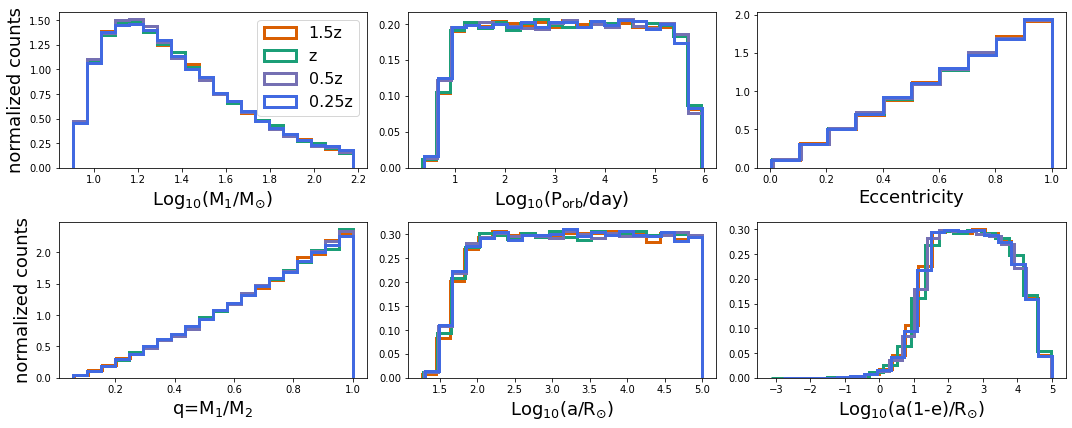

In [13]:
init_z37_5['sep'] = a_from_p(p=init_z37_5.porb, m1=init_z37_5.mass_1, m2=init_z37_5.mass_2)
init_z01_25['sep'] = a_from_p(p=init_z01_25.porb, m1=init_z01_25.mass_1, m2=init_z01_25.mass_2)
init_z50['sep'] = a_from_p(p=init_z50.porb, m1=init_z50.mass_1, m2=init_z50.mass_2)
init_z25['sep'] = a_from_p(p=init_z25.porb, m1=init_z25.mass_1, m2=init_z25.mass_2)

fig = plt.figure(figsize = (15,6))
ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233)
ax4 = plt.subplot(234)
ax5 = plt.subplot(235)
ax6 = plt.subplot(236)
ax1.hist(np.log10(init_z37_5.mass_1), bins = 20, histtype='step', density=True,
         lw=3, color=colors['purple'], label='1.5z')
ax1.hist(np.log10(init_z01_25.mass_1), bins = 20, histtype='step', density=True,
         lw=3, color=colors['green'], label='z')
ax1.hist(np.log10(init_z50.mass_1), bins = 20, histtype='step', density=True,
         lw=3, color=colors['orange'], label='0.5z')
ax1.hist(np.log10(init_z25.mass_1), bins = 20, histtype='step', density=True,
         lw=3, color=colors['blue'], label='0.25z')
ax1.set_xlabel(r'Log$_{10}$(M$_1$/M$_{\odot}$)', size=18)
ax1.set_ylabel('normalized counts', size=18)
ax1.legend(prop={'size' : 16})
ax2.hist(np.log10(init_z37_5.porb), bins = 20, histtype='step', density=True,
         lw=3, color=colors['purple'])
ax2.hist(np.log10(init_z01_25.porb), bins = 20, histtype='step', density=True,
         lw=3, color=colors['green'])
ax2.hist(np.log10(init_z50.porb), bins = 20, histtype='step', density=True,
         lw=3, color=colors['orange'])
ax2.hist(np.log10(init_z25.porb), bins = 20, histtype='step', density=True,
         lw=3, color=colors['blue'])
ax2.set_xlabel(r'Log$_{10}$(P$_{\rm{orb}}$/day)', size=18)
ax3.hist(init_z37_5.ecc, bins = 10, histtype='step', density=True,
         lw=3, color=colors['purple'])
ax3.hist(init_z01_25.ecc, bins = 10, histtype='step', density=True,
         lw=3, color=colors['green'])
ax3.hist(init_z50.ecc, bins = 10, histtype='step', density=True,
         lw=3, color=colors['orange'])
ax3.hist(init_z25.ecc, bins = 10, histtype='step', density=True,
         lw=3, color=colors['blue'])
ax3.set_xlabel('Eccentricity', size=18)
ax4.hist(init_z37_5.mass_2/init_z37_5.mass_1, bins = 20, histtype='step', density=True,
         lw=3, color=colors['purple'])
ax4.hist(init_z01_25.mass_2/init_z01_25.mass_1, bins = 20, histtype='step', density=True,
         lw=3, color=colors['green'])
ax4.hist(init_z50.mass_2/init_z50.mass_1, bins = 20, histtype='step', density=True,
         lw=3, color=colors['orange'])
ax4.hist(init_z25.mass_2/init_z25.mass_1, bins = 20, histtype='step', density=True,
         lw=3, color=colors['blue'])
ax4.set_xlabel(r'q=M$_1$/M$_2$', size=18)
ax4.set_ylabel('normalized counts', size=18)
ax5.hist(np.log10(init_z37_5.sep), bins = 20, histtype='step', density=True,
         lw=3, color=colors['purple'])
ax5.hist(np.log10(init_z01_25.sep), bins = 20, histtype='step', density=True,
         lw=3, color=colors['green'])
ax5.hist(np.log10(init_z50.sep), bins = 20, histtype='step', density=True,
         lw=3, color=colors['orange'])
ax5.hist(np.log10(init_z25.sep), bins = 20, histtype='step', density=True,
         lw=3, color=colors['blue'])
ax5.set_xlabel(r'Log$_{10}$(a/R$_{\odot}$)', size=18)
ax6.hist(np.log10(init_z37_5.sep*(1-init_z37_5.ecc)), bins = 20, histtype='step', density=True,
         lw=3, color=colors['purple'])
ax6.hist(np.log10(init_z01_25.sep*(1-init_z01_25.ecc)), bins = 20, histtype='step', density=True,
         lw=3, color=colors['green'])
ax6.hist(np.log10(init_z50.sep*(1-init_z50.ecc)), bins = 20, histtype='step', density=True,
         lw=3, color=colors['orange'])
ax6.hist(np.log10(init_z25.sep*(1-init_z25.ecc)), bins = 20, histtype='step', density=True,
         lw=3, color=colors['blue'])
ax6.set_xlabel(r'Log$_{10}$(a(1-e)/R$_{\odot}$)', size=18)
fig.tight_layout()
fig.show()

flat mass ratio from 0 to 1, flat semi-major axis in log space, eccentricities follow a thermal distribution, p(e)de = 2e de

/home/xiaoqi/anaconda3/envs/cosmic/lib/python3.7/site-packages/ipykernel_launcher.py:71: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


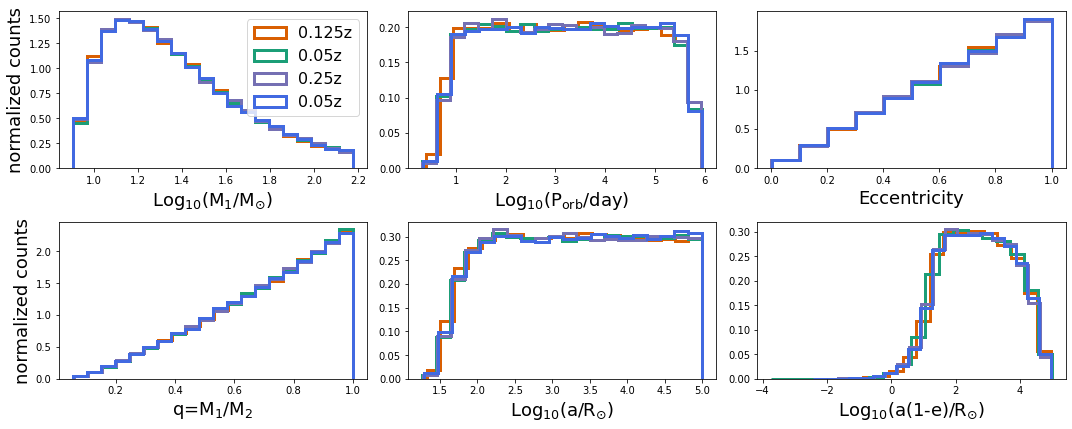

In [14]:
init_z12_5['sep'] = a_from_p(p=init_z12_5.porb, m1=init_z12_5.mass_1, m2=init_z12_5.mass_2)
init_z05['sep'] = a_from_p(p=init_z05.porb, m1=init_z05.mass_1, m2=init_z05.mass_2)
init_z02_5['sep'] = a_from_p(p=init_z02_5.porb, m1=init_z02_5.mass_1, m2=init_z02_5.mass_2)
init_z005['sep'] = a_from_p(p=init_z005.porb, m1=init_z005.mass_1, m2=init_z005.mass_2)

fig = plt.figure(figsize = (15,6))
ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233)
ax4 = plt.subplot(234)
ax5 = plt.subplot(235)
ax6 = plt.subplot(236)
ax1.hist(np.log10(init_z12_5.mass_1), bins = 20, histtype='step', density=True,
         lw=3, color=colors['purple'], label='0.125z')
ax1.hist(np.log10(init_z05.mass_1), bins = 20, histtype='step', density=True,
         lw=3, color=colors['green'], label='0.05z')
ax1.hist(np.log10(init_z02_5.mass_1), bins = 20, histtype='step', density=True,
         lw=3, color=colors['orange'], label='0.25z')
ax1.hist(np.log10(init_z005.mass_1), bins = 20, histtype='step', density=True,
         lw=3, color=colors['blue'], label='0.05z')
ax1.set_xlabel(r'Log$_{10}$(M$_1$/M$_{\odot}$)', size=18)
ax1.set_ylabel('normalized counts', size=18)
ax1.legend(prop={'size' : 16})
ax2.hist(np.log10(init_z12_5.porb), bins = 20, histtype='step', density=True,
         lw=3, color=colors['purple'])
ax2.hist(np.log10(init_z05.porb), bins = 20, histtype='step', density=True,
         lw=3, color=colors['green'])
ax2.hist(np.log10(init_z02_5.porb), bins = 20, histtype='step', density=True,
         lw=3, color=colors['orange'])
ax2.hist(np.log10(init_z005.porb), bins = 20, histtype='step', density=True,
         lw=3, color=colors['blue'])
ax2.set_xlabel(r'Log$_{10}$(P$_{\rm{orb}}$/day)', size=18)
ax3.hist(init_z12_5.ecc, bins = 10, histtype='step', density=True,
         lw=3, color=colors['purple'])
ax3.hist(init_z05.ecc, bins = 10, histtype='step', density=True,
         lw=3, color=colors['green'])
ax3.hist(init_z02_5.ecc, bins = 10, histtype='step', density=True,
         lw=3, color=colors['orange'])
ax3.hist(init_z005.ecc, bins = 10, histtype='step', density=True,
         lw=3, color=colors['blue'])
ax3.set_xlabel('Eccentricity', size=18)
ax4.hist(init_z12_5.mass_2/init_z12_5.mass_1, bins = 20, histtype='step', density=True,
         lw=3, color=colors['purple'])
ax4.hist(init_z05.mass_2/init_z05.mass_1, bins = 20, histtype='step', density=True,
         lw=3, color=colors['green'])
ax4.hist(init_z02_5.mass_2/init_z02_5.mass_1, bins = 20, histtype='step', density=True,
         lw=3, color=colors['orange'])
ax4.hist(init_z005.mass_2/init_z005.mass_1, bins = 20, histtype='step', density=True,
         lw=3, color=colors['blue'])
ax4.set_xlabel(r'q=M$_1$/M$_2$', size=18)
ax4.set_ylabel('normalized counts', size=18)
ax5.hist(np.log10(init_z12_5.sep), bins = 20, histtype='step', density=True,
         lw=3, color=colors['purple'])
ax5.hist(np.log10(init_z05.sep), bins = 20, histtype='step', density=True,
         lw=3, color=colors['green'])
ax5.hist(np.log10(init_z02_5.sep), bins = 20, histtype='step', density=True,
         lw=3, color=colors['orange'])
ax5.hist(np.log10(init_z005.sep), bins = 20, histtype='step', density=True,
         lw=3, color=colors['blue'])
ax5.set_xlabel(r'Log$_{10}$(a/R$_{\odot}$)', size=18)
ax6.hist(np.log10(init_z12_5.sep*(1-init_z12_5.ecc)), bins = 20, histtype='step', density=True,
         lw=3, color=colors['purple'])
ax6.hist(np.log10(init_z05.sep*(1-init_z05.ecc)), bins = 20, histtype='step', density=True,
         lw=3, color=colors['green'])
ax6.hist(np.log10(init_z02_5.sep*(1-init_z02_5.ecc)), bins = 20, histtype='step', density=True,
         lw=3, color=colors['orange'])
ax6.hist(np.log10(init_z005.sep*(1-init_z005.ecc)), bins = 20, histtype='step', density=True,
         lw=3, color=colors['blue'])
ax6.set_xlabel(r'Log$_{10}$(a(1-e)/R$_{\odot}$)', size=18)
fig.tight_layout()
fig.show()

In [15]:
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.5, 'mxns': 2.5, 'beta': 0.125, 'tflag': 1, 'acc2': 1.5, 'remnantflag': 3, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -1.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.5, 'ecsn_mlow' : 1.4, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 2, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 0, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014}

In [16]:
start = time.time()
bpp_z37_5, bcm_z37_5, initC_z37_5, kick_info_z37_5  = Evolve.evolve(initialbinarytable=init_z37_5, BSEDict=BSEDict)
bpp_z01_25, bcm_z01_25, initC_z01_25, kick_info_z01_25  = Evolve.evolve(initialbinarytable=init_z01_25, BSEDict=BSEDict)
bpp_z50, bcm_z50, initC_z50, kick_info_z50  = Evolve.evolve(initialbinarytable=init_z50, BSEDict=BSEDict)
bpp_z25, bcm_z25, initC_z25, kick_info_z25  = Evolve.evolve(initialbinarytable=init_z25, BSEDict=BSEDict)

end = time.time()
print("--- %s seconds ---" % (end - start))

/home/xiaoqi/anaconda3/envs/cosmic/lib/python3.7/site-packages/cosmic/evolve.py:534: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  output = np.array(output)
/home/xiaoqi/anaconda3/envs/cosmic/lib/python3.7/site-packages/cosmic/evolve.py:534: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  output = np.array(output)
/home/xiaoqi/anaconda3/envs/cosmic/lib/python3.7/site-packages/cosmic/evolve.py:534: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or 

--- 8349.805417776108 seconds ---


In [55]:
start = time.time()
bpp_z37_5, bcm_z37_5, initC_z37_5, kick_info_z37_5  = Evolve.evolve(initialbinarytable=init_z37_5, BSEDict=BSEDict)
end = time.time()
print("--- %s seconds ---" % (end - start))

/home/xiaoqi/anaconda3/envs/cosmic/lib/python3.7/site-packages/cosmic/evolve.py:534: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  output = np.array(output)


--- 2161.679484128952 seconds ---


In [17]:
start = time.time()
bpp_z12_5, bcm_z12_5, initC_z12_5, kick_info_z12_5  = Evolve.evolve(initialbinarytable=init_z12_5, BSEDict=BSEDict)
bpp_z05, bcm_z05, initC_z05, kick_info_z05  = Evolve.evolve(initialbinarytable=init_z05, BSEDict=BSEDict)
end = time.time()
print("--- %s seconds ---" % (end - start))

/home/xiaoqi/anaconda3/envs/cosmic/lib/python3.7/site-packages/cosmic/evolve.py:534: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  output = np.array(output)
/home/xiaoqi/anaconda3/envs/cosmic/lib/python3.7/site-packages/cosmic/evolve.py:534: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  output = np.array(output)


--- 3547.2931389808655 seconds ---


In [18]:
start = time.time()
bpp_z02_5, bcm_z02_5, initC_z02_5, kick_info_z02_5  = Evolve.evolve(initialbinarytable=init_z02_5, BSEDict=BSEDict)
bpp_z005, bcm_z005, initC_z005, kick_info_z005  = Evolve.evolve(initialbinarytable=init_z005, BSEDict=BSEDict)
end = time.time()
print("--- %s seconds ---" % (end - start))

/home/xiaoqi/anaconda3/envs/cosmic/lib/python3.7/site-packages/cosmic/evolve.py:534: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  output = np.array(output)
/home/xiaoqi/anaconda3/envs/cosmic/lib/python3.7/site-packages/cosmic/evolve.py:534: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  output = np.array(output)


--- 6091.537079572678 seconds ---


We limit our sample to only those BBHs that will not erupted within 13.8 Gyr

In [19]:
def unique_elements(X):
    return len(np.unique(X)) == len(X)

Let's start with metallity = 1.5z first

In [20]:
def merge_BBH(bpp):
    """make a dataframe for those BBH which merge within hubble time
    input: data frame for a population of binaries
    output: data frame for initial state of binary black holes in the population which eventually merge"""
    bpp_BBH = bpp.loc[(bpp['kstar_1']==14) & (bpp["kstar_2"]==14) & (bpp["sep"]>0) & (bpp["tphys"]<13700) & (bpp["evol_type"]==2)]
    if unique_elements(bpp_BBH.index):
        temp_bin = np.array(bpp_BBH[["mass_1", "mass_2", "sep", "ecc"]])
        merge_t =[]
        for binary in temp_bin:
            m1, m2, a0, e0 = binary
            t = time_to_merge(m1, m2, a0, e0)
            merge_t.append(t)
        bpp_BBH['TtoMerge'] = merge_t
        merged_bbh = bpp_BBH.loc[bpp_BBH['TtoMerge']< 13700 - bpp_BBH['tphys']]
        return merged_bbh
    else:
        return("no binary black holes found in the population") 
    

In [56]:
z37_5_merged_BBH = merge_BBH(bpp_z37_5)

/home/xiaoqi/anaconda3/envs/cosmic/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [22]:
z01_25_merged_BBH = merge_BBH(bpp_z01_25)

/home/xiaoqi/anaconda3/envs/cosmic/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [23]:
z50_merged_BBH = merge_BBH(bpp_z50)

/home/xiaoqi/anaconda3/envs/cosmic/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [24]:
z12_5_merged_BBH = merge_BBH(bpp_z12_5)

/home/xiaoqi/anaconda3/envs/cosmic/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [25]:
z25_merged_BBH = merge_BBH(bpp_z25)

/home/xiaoqi/anaconda3/envs/cosmic/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [26]:
z05_merged_BBH = merge_BBH(bpp_z05)

/home/xiaoqi/anaconda3/envs/cosmic/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [27]:
z02_5_merged_BBH = merge_BBH(bpp_z02_5)

/home/xiaoqi/anaconda3/envs/cosmic/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [28]:
z005_merged_BBH = merge_BBH(bpp_z005)

/home/xiaoqi/anaconda3/envs/cosmic/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [29]:
len(z005_merged_BBH)

1406

In [30]:
def kick_info_mergedBBH(kick, bcm_merged):
    """find kick information during supernova for corresponding binary black whole that eventually merge"""
    kick_merge = pd.DataFrame()
    for i in bcm_merged.index:
        kick_merge = kick_merge.append(kick.loc[kick.index==i])
    return kick_merge

In [57]:
kick_merged_z37_5 = kick_info_mergedBBH(kick_info_z37_5, z37_5_merged_BBH)
kick_merged_z01_25 = kick_info_mergedBBH(kick_info_z01_25, z01_25_merged_BBH)
kick_merged_z50 = kick_info_mergedBBH(kick_info_z50, z50_merged_BBH)
kick_merged_z25 = kick_info_mergedBBH(kick_info_z25, z25_merged_BBH)
kick_merged_z12_5 = kick_info_mergedBBH(kick_info_z12_5, z12_5_merged_BBH)
kick_merged_z05 = kick_info_mergedBBH(kick_info_z05, z05_merged_BBH)
kick_merged_z02_5 = kick_info_mergedBBH(kick_info_z02_5, z02_5_merged_BBH)
kick_merged_z005 = kick_info_mergedBBH(kick_info_z005, z005_merged_BBH)

NameError: name 'kick_info_z01_25' is not defined

In [32]:
def add_component(original_frame, func, args):
    """
    input: original data frame, function to calculate new value, the arguments for the function
    output: the value array you want to add"""
    temp_bin = np.array(original_frame[args])
    val =[]
    for binary in temp_bin:
        val.append(func(*binary))
    return val
    

In [139]:
z37_5_merged_BBH["chirp"] = add_component(z37_5_merged_BBH, chirp_m, ["mass_1", "mass_2"])

In [140]:
z01_25_merged_BBH["chirp"] = add_component(z01_25_merged_BBH, chirp_m, ["mass_1", "mass_2"])

In [141]:
z50_merged_BBH["chirp"] = add_component(z50_merged_BBH, chirp_m, ["mass_1", "mass_2"])

In [142]:
z25_merged_BBH["chirp"] = add_component(z25_merged_BBH, chirp_m, ["mass_1", "mass_2"])

In [143]:
z12_5_merged_BBH["chirp"] = add_component(z12_5_merged_BBH, chirp_m, ["mass_1", "mass_2"])

In [144]:
z05_merged_BBH["chirp"] = add_component(z05_merged_BBH, chirp_m, ["mass_1", "mass_2"])

In [145]:
z02_5_merged_BBH["chirp"] = add_component(z02_5_merged_BBH, chirp_m, ["mass_1", "mass_2"])

In [146]:
z005_merged_BBH["chirp"] = add_component(z005_merged_BBH, chirp_m, ["mass_1", "mass_2"])

In [148]:
z50_merged_BBH

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,...,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num,TtoMerge,chirp
0,5.823155,14.101984,11.119134,14.0,14.0,5.104799,0.266169,0.022734,0.000030,0.000026,...,0.0,0.0,0.0,3.761552,5.823155,0.0,0.0,0,25.859360,10.885737
108,5.587480,11.780656,11.773382,14.0,14.0,3.560166,0.160415,0.082158,0.000040,0.000040,...,0.0,0.0,0.0,3.887867,5.587480,0.0,0.0,108,7.238528,10.252490
164,7.326550,8.703245,7.435980,14.0,14.0,11.260641,1.090123,0.108606,0.000009,0.000009,...,0.0,0.0,0.0,5.589900,7.326550,0.0,0.0,164,2224.304458,6.998986
246,6.844531,9.100505,8.469823,14.0,14.0,7.190619,0.533128,0.242484,0.000018,0.000018,...,0.0,0.0,0.0,5.365401,6.844531,0.0,0.0,246,239.000473,7.642016
251,5.288304,14.085165,12.235409,14.0,14.0,22.335943,2.384684,0.069764,0.000007,0.000007,...,0.0,0.0,0.0,3.984798,5.288304,0.0,0.0,251,8132.929201,11.422711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51080,5.362557,13.848633,12.200805,14.0,14.0,13.735853,1.155996,0.136339,0.000013,0.000012,...,0.0,0.0,0.0,3.769532,5.362557,0.0,0.0,51080,1139.632422,11.311431
51087,8.020419,7.909833,6.576641,14.0,14.0,4.457920,0.286609,0.189619,0.000024,0.000021,...,0.0,0.0,0.0,6.005875,8.020419,0.0,0.0,51087,69.207999,6.273506
51130,5.989682,11.592918,10.614764,14.0,14.0,3.268405,0.145320,0.037129,0.000040,0.000039,...,0.0,0.0,0.0,4.164812,5.989682,0.0,0.0,51130,6.268859,9.655198
51254,5.432917,14.297699,12.037185,14.0,14.0,4.341906,0.204328,0.044297,0.000037,0.000034,...,0.0,0.0,0.0,3.803744,5.432917,0.0,0.0,51254,11.746918,11.412173


In [147]:
kick_merged_z50

,star,disrupted,natal_kick,phi,theta,eccentric_anomaly,delta_vsysx_1,delta_vsysy_1,delta_vsysz_1,vsys_1_total,delta_vsysx_2,delta_vsysy_2,delta_vsysz_2,vsys_2_total,delta_theta_total,omega,randomseed,bin_num
0,2.0,0.0,55.972679,-63.389013,323.769643,262.585151,-28.076375,-36.633266,-43.579745,58.338618,0.0,0.0,-0.0,0.0,62.410588,2.357008,1.578709e+09,0.0
108,2.0,0.0,74.241362,47.535330,44.714492,215.914114,13.941197,-3.783659,-55.487817,61.762342,0.0,0.0,0.0,0.0,147.155259,2.388573,1.800494e+09,108.0
164,2.0,0.0,95.512976,-25.414377,336.618261,228.708873,-54.729747,-75.897466,7.578509,94.040556,-0.0,0.0,0.0,0.0,4.757490,-25.543722,1.953166e+09,164.0
246,2.0,0.0,186.752743,-35.515724,196.498096,104.552507,-26.126091,-67.919833,116.590560,137.733335,0.0,-0.0,0.0,0.0,11.573134,-0.179849,1.881828e+08,246.0
251,2.0,0.0,47.776727,37.394448,166.111715,238.175397,-20.153530,17.712175,-14.157201,30.382458,-0.0,0.0,0.0,0.0,15.664355,-7.157136,2.974414e+08,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51080,2.0,0.0,58.419756,-21.904247,246.295753,21.985900,-20.081665,-25.377153,-30.308282,45.036660,0.0,0.0,-0.0,0.0,168.899588,-6.783546,2.072232e+09,51080.0
51087,2.0,0.0,165.836072,12.849895,68.588183,67.596769,-14.043081,52.148421,-156.278328,165.874068,0.0,0.0,0.0,0.0,3.252097,56.592807,8.077289e+08,51087.0
51130,2.0,0.0,105.526369,-74.821909,216.206925,335.654576,7.854476,97.115909,6.622778,97.314989,0.0,0.0,0.0,0.0,29.936790,7.899874,6.489134e+08,51130.0
51254,2.0,0.0,34.594379,-36.499370,250.859671,269.051185,15.473703,-36.132421,-18.871992,42.080637,0.0,-0.0,0.0,0.0,65.594285,0.554156,5.800881e+08,51254.0


In [44]:
np.array(kick_merged_z50["delta_theta_total"])

array([  7.36360224,  62.41058821,  22.61271161, ...,  65.59428534,
         3.47033043, 159.2172723 ])

In [45]:
np.array(kick_merged_z37_5["delta_theta_total"])

array([ 0.        ,  3.03179666, 16.65753759, ...,  6.57105966,
        0.        ,  4.23145404])

In [47]:
kick_merged_z37_5

,star,disrupted,natal_kick,phi,theta,eccentric_anomaly,delta_vsysx_1,delta_vsysy_1,delta_vsysz_1,vsys_1_total,delta_vsysx_2,delta_vsysy_2,delta_vsysz_2,vsys_2_total,delta_theta_total,omega,randomseed,bin_num
88,1.0,0.0,0.000000,56.343849,265.297143,186.985824,0.086731,0.393804,0.440095,0.596898,0.0,0.0,0.0,0.0,0.000000,6.101462,-9.379486e+08,88.0
88,2.0,0.0,101.166044,18.580503,196.891093,145.268419,86.748009,12.588505,-46.542436,99.167728,0.0,0.0,0.0,0.0,3.031797,-72.248014,8.641885e+08,88.0
143,1.0,0.0,73.059368,-48.753689,32.370242,120.124254,-7.977848,11.299092,13.330730,19.209995,0.0,0.0,0.0,0.0,16.657538,34.011338,-2.618750e+08,143.0
143,2.0,0.0,58.382034,-78.037318,272.236769,261.507010,-66.361210,4.814180,-31.971058,78.315995,0.0,0.0,-0.0,0.0,130.007510,-0.907184,1.976151e+09,143.0
185,1.0,0.0,43.809344,12.724940,96.398592,29.054434,-2.708034,-2.811710,-4.904301,6.268280,0.0,0.0,0.0,0.0,7.450669,243.231146,-6.247399e+08,185.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50048,2.0,0.0,0.000000,4.265283,168.895108,287.241540,-3.306604,1.886794,9.034478,9.126169,0.0,0.0,0.0,0.0,70.683557,0.000000,4.294168e+08,50048.0
50175,1.0,0.0,0.000000,-7.646976,285.971439,151.379993,0.572122,-0.356621,0.085759,0.679600,0.0,0.0,0.0,0.0,0.000000,242.393074,-2.886848e+08,50175.0
50175,2.0,0.0,138.645025,33.930325,36.728615,277.357106,89.560152,38.728541,68.197195,119.410187,0.0,0.0,0.0,0.0,6.571060,86.506530,2.029125e+09,50175.0
50204,1.0,0.0,0.000000,44.038513,213.991549,0.363642,0.142800,-1.954679,-0.979443,2.190998,0.0,-0.0,0.0,0.0,0.000000,278.241441,-2.213311e+07,50204.0


In [48]:
import gc

In [49]:
del kick_info_z37_5
del kick_info_z01_25
del kick_info_z50
del kick_info_z25
del kick_info_z12_5
del kick_info_z05
del kick_info_z02_5
del kick_info_z005

In [50]:
del bpp_z37_5
del bpp_z01_25
del bpp_z50
del bpp_z25
del bpp_z12_5
del bpp_z05
del bpp_z02_5
del bpp_z005

In [51]:
import gc
gc.collect()

180

find those with none-zero natal kick

In [59]:
kick_merged_z37_5 = kick_merged_z37_5.loc[(kick_merged_z37_5['star']==2) & (kick_merged_z37_5["natal_kick"]!=0)]

In [60]:
kick_merged_z37_5

,star,disrupted,natal_kick,phi,theta,eccentric_anomaly,delta_vsysx_1,delta_vsysy_1,delta_vsysz_1,vsys_1_total,delta_vsysx_2,delta_vsysy_2,delta_vsysz_2,vsys_2_total,delta_theta_total,omega,randomseed,bin_num
9,2.0,0.0,7.719090,-41.177635,177.486867,333.499281,-0.338867,-2.848954,-11.612813,9.664411,0.0,0.0,-0.0,0.0,161.375133,1.348587,1.720435e+09,9.0
88,2.0,0.0,51.322894,-68.495933,216.945219,167.742755,-27.902752,-56.005419,-4.438508,62.170868,0.0,0.0,-0.0,0.0,3.984743,-70.258691,9.762742e+08,88.0
143,2.0,0.0,97.150432,-35.548344,177.431924,156.578618,-57.728523,-82.222734,17.653442,113.507595,0.0,0.0,0.0,0.0,50.060666,1.669222,1.578257e+09,143.0
235,2.0,0.0,11.561905,33.253729,136.666521,302.987351,-8.507243,13.960512,-10.880829,29.365272,-0.0,0.0,0.0,0.0,52.725826,0.023286,9.218696e+07,235.0
565,2.0,0.0,117.844766,54.997322,324.183776,155.988843,-1.422135,-41.501193,-82.874195,93.018994,0.0,0.0,-0.0,0.0,10.301715,-34.066724,2.330760e+08,565.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49750,2.0,0.0,150.556104,0.515357,128.803732,192.101569,76.274395,-84.517300,48.443874,123.853247,0.0,0.0,0.0,0.0,146.754384,-8.308838,1.425600e+09,49750.0
49801,2.0,0.0,140.453258,72.375319,2.798320,88.473651,-0.263305,-105.534886,-27.866589,117.119439,0.0,0.0,-0.0,0.0,156.521841,-6.723414,1.907873e+09,49801.0
49904,2.0,0.0,116.858523,7.823194,230.392742,183.480735,23.373716,-131.926426,11.951862,135.521986,-0.0,0.0,0.0,0.0,69.504868,-2.247601,1.019395e+09,49904.0
50175,2.0,0.0,129.052462,-62.427324,94.977279,75.235024,5.691541,-116.453921,27.229875,119.826532,0.0,0.0,0.0,0.0,9.798310,70.455221,3.065801e+08,50175.0


In [65]:
def nonezeroKick(kick_info, bpp):
    kick_info = kick_info.loc[(kick_info['star']==2) & (kick_info["natal_kick"]!=0)]
    bpp_new = pd.DataFrame()
    for i in kick_info.index:
        bpp_new = bpp_new.append(bpp.loc[bpp.index==i])
    return kick_info, bpp_new

In [66]:
kick_merged_z37_5, z37_5_merged_BBH = nonezeroKick(kick_merged_z37_5, z37_5_merged_BBH)

In [77]:
kick_merged_z01_25, z01_25_merged_BBH = nonezeroKick(kick_merged_z01_25, z01_25_merged_BBH)

In [68]:
kick_merged_z50, z50_merged_BBH = nonezeroKick(kick_merged_z50, z50_merged_BBH)

In [69]:
kick_merged_z25, z25_merged_BBH = nonezeroKick(kick_merged_z25, z25_merged_BBH)

In [70]:
kick_merged_z12_5, z12_5_merged_BBH = nonezeroKick(kick_merged_z12_5, z12_5_merged_BBH)

In [71]:
kick_merged_z02_5, z02_5_merged_BBH = nonezeroKick(kick_merged_z02_5, z02_5_merged_BBH)

In [72]:
kick_merged_z05, z05_merged_BBH = nonezeroKick(kick_merged_z05, z05_merged_BBH)

In [73]:
kick_merged_z005, z005_merged_BBH = nonezeroKick(kick_merged_z005, z005_merged_BBH)

In [83]:
z37_5_merged_BBH

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,...,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num,TtoMerge,chirp
9,6.371720,9.951607,13.372453,14.0,14.0,11.221521,0.902085,0.035573,0.000011,0.000013,...,0.0,0.0,0.0,4.735202,6.371720,0.0,0.0,9,767.236650,0.635960
88,7.694284,8.628143,9.419314,14.0,14.0,9.108739,0.749983,0.111356,0.000012,0.000013,...,0.0,0.0,0.0,6.089168,7.694284,0.0,0.0,88,676.636530,0.590987
143,7.847386,10.319833,6.789527,14.0,14.0,9.188877,0.780457,0.108549,0.000013,0.000010,...,0.0,0.0,0.0,4.599174,7.847386,0.0,0.0,143,859.344565,0.728540
235,6.183311,10.282927,13.407361,14.0,14.0,5.791016,0.331833,0.018461,0.000022,0.000025,...,0.0,0.0,0.0,4.779194,6.183311,0.0,0.0,235,51.890359,0.622618
565,8.325556,8.958689,7.718532,14.0,14.0,12.244743,1.216004,0.105275,0.000009,0.000008,...,0.0,0.0,0.0,6.006843,8.325556,0.0,0.0,565,2824.100326,0.622875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49750,7.991810,8.922342,6.874437,14.0,14.0,7.537913,0.603482,0.178240,0.000015,0.000013,...,0.0,0.0,0.0,4.892752,7.991810,0.0,0.0,49750,447.003346,0.673335
49801,7.426722,9.187890,9.226429,14.0,14.0,5.033126,0.304966,0.121937,0.000023,0.000023,...,0.0,0.0,0.0,4.816204,7.426722,0.0,0.0,49801,58.730363,0.559834
49904,7.680390,8.576645,8.355552,14.0,14.0,3.293327,0.168332,0.114380,0.000033,0.000032,...,0.0,0.0,0.0,4.966407,7.680390,0.0,0.0,49904,13.941676,0.576850
50175,9.127138,7.957773,6.662161,14.0,14.0,7.483996,0.620583,0.098444,0.000013,0.000012,...,0.0,0.0,0.0,6.430049,9.127138,0.0,0.0,50175,589.375196,0.650604


In [75]:
from cosmic.utils import convert_kstar_evol_type

In [76]:
convert_kstar_evol_type(z01_25_merged_BBH.iloc[z01_25_merged_BBH.index==60][['mass_1', 'mass_2', 'kstar_1', 'kstar_2', 'sep', 'evol_type', 'tphys']])

,mass_1,mass_2,kstar_1,kstar_2,sep,evol_type,tphys
60,10.74814,9.942573,Black Hole,Black Hole,3.539361,kstar change,11.29492


In [103]:
len(kick_merged_z37_5)+len(kick_merged_z01_25)+len(kick_merged_z50)+len(kick_merged_z25)+len(kick_merged_z12_5)+len(kick_merged_z02_5)+len(kick_merged_z05)#+len(kick_merged_z005)

5645

In [79]:
data_array = np.zeros([6201,2])

In [123]:
data_array[:len(z37_5_merged_BBH),0] = np.array(z37_5_merged_BBH['chirp'])

In [124]:
data_array

array([[ 10.02078493, 161.37513256],
       [  7.84655022,   3.98474256],
       [  7.25538674,  50.06066606],
       ...,
       [  0.59320068,  26.9294366 ],
       [  0.70251292,  11.60077992],
       [  0.62482876,   3.63533604]])

In [125]:
data_array[:len(kick_merged_z37_5),1] = np.array(kick_merged_z37_5['delta_theta_total'])

In [126]:
data_array[605:605+len(z01_25_merged_BBH),0] = np.array(z01_25_merged_BBH['chirp'])
data_array[605:605+len(z01_25_merged_BBH),1] = np.array(kick_merged_z01_25['delta_theta_total'])

In [127]:
data_array[1199:1199+len(z50_merged_BBH),0] = np.array(z50_merged_BBH['chirp'])
data_array[1199:1199+len(z50_merged_BBH),1] = np.array(kick_merged_z50['delta_theta_total'])

In [128]:
data_array[2497:2497+len(z25_merged_BBH),0] = np.array(z25_merged_BBH['chirp'])
data_array[2497:2497+len(z25_merged_BBH),1] = np.array(kick_merged_z25['delta_theta_total'])

In [129]:
data_array[2943:2943+len(z12_5_merged_BBH),0] = np.array(z12_5_merged_BBH['chirp'])
data_array[2943:2943+len(z12_5_merged_BBH),1] = np.array(kick_merged_z12_5['delta_theta_total'])

In [130]:
data_array[3848:3848+len(z02_5_merged_BBH),0] = np.array(z02_5_merged_BBH['chirp'])
data_array[3848:3848+len(z02_5_merged_BBH),1] = np.array(kick_merged_z02_5['delta_theta_total'])

In [131]:
data_array[4713:4713+len(z05_merged_BBH),0] = np.array(z05_merged_BBH['chirp'])
data_array[4713:4713+len(z05_merged_BBH),1] = np.array(kick_merged_z05['delta_theta_total'])

In [132]:
data_array[5645:5645+len(z005_merged_BBH),0] = np.array(z005_merged_BBH['chirp'])
data_array[5645:5645+len(z005_merged_BBH),1] = np.array(kick_merged_z005['delta_theta_total'])

In [133]:
data_array

array([[ 10.02078493, 161.37513256],
       [  7.84655022,   3.98474256],
       [  7.25538674,  50.06066606],
       ...,
       [  8.38587801,  26.9294366 ],
       [  6.62275678,  11.60077992],
       [  6.39416739,   3.63533604]])

In [134]:
np.save("chirpM_tilt.npy",data_array)

In [135]:
import seaborn as sns

sns.set(color_codes=True)
ax = sns.tsplot(data=data_array, ci=[50, 90, 99], color="m")

ImportError: cannot import name 'float_factorial' from 'scipy._lib._util' (/home/xiaoqi/anaconda3/envs/cosmic/lib/python3.7/site-packages/scipy/_lib/_util.py)